In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("Data_Glioblastoma5Patients_SC.csv")

       A2M      AAAS      AAK1      AAMP      AARS    AARSD1     AASDH  \
0 -3.80147 -3.889900 -3.985616  2.651558  2.170748 -2.550822  4.807330   
1 -3.80147 -3.889900 -3.158708  2.358992 -6.041792 -0.056092  3.606735   
2 -3.80147 -3.889900  1.733125 -5.820241 -6.041792 -0.576957 -2.473517   
3 -3.80147 -3.889900 -1.665669  3.514271 -6.041792 -3.699171  4.509461   
4 -3.80147  3.742495 -2.166992 -5.820241  2.094729  4.021873  5.535007   

   AASDHPPT      AASS      AATF  ...    ZSWIM6    ZSWIM7     ZUFSP      ZW10  \
0  3.961170 -0.192665  3.614482  ...  2.909466 -3.118284 -1.538324 -1.550699   
1 -2.632250  2.249388  6.857517  ... -1.821098 -3.118284 -1.538324 -1.550699   
2 -4.354127  0.063178 -2.570976  ... -1.821098  5.521892 -1.538324 -1.550699   
3 -4.354127  2.985972 -2.570976  ...  4.952176 -0.854351 -1.538324 -1.550699   
4  4.019633  2.560370 -2.570976  ... -1.821098  4.328808 -1.538324  7.021985   

     ZWILCH      ZXDC    ZYG11B       ZYX      ZZZ3  Classes  
0 -1.558581

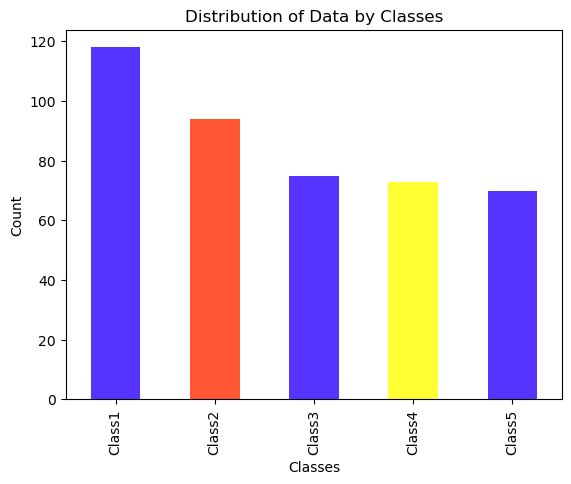

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64


In [2]:
# Display the first few rows of the dataset
print(df.head())

# Print the names of all columns in the DataFrame
print(df.columns)

#df.describe()

# Visualize the class distribution (assuming the target is a categorical variable)
#plt.figure(figsize=(6, 4))
#sns.countplot(x='Classes', data=df)
#plt.title('Distribution of Target Variable (Classes)')
#plt.xlabel('Target Class')
#plt.ylabel('Count')
#plt.show()

import random

# Count the number of unique entries for each class (assuming 'Classes' is your target variable)
class_counts = df['Classes'].value_counts().sort_index()

# Plot the distribution of data by class with random colors
bar_colors = [random.choice(['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33']) for _ in range(len(class_counts))]
class_counts.plot(kind='bar', color=bar_colors, title='Distribution of Data by Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Print the counts
print(class_counts)



In [3]:
# Correlation matrix
# Selecting only numeric columns for correlation matrix
##numeric_columns = df.select_dtypes(include=[np.number])
# Create a correlation matrix
##correlation_matrix = numeric_columns.corr()
# Create a heatmap
##plt.figure(figsize=(10, 8))
##sns.heatmap(correlation_matrix, cmap='coolwarm')
##plt.title('Correlation Heatmap')
##plt.show()

In [4]:
# Check for missing values in the dataset and print the counts
print("\nMissing values in t|he dataset:")
print(df.isnull().sum())


Missing values in t|he dataset:
A2M        0
AAAS       0
AAK1       0
AAMP       0
AARS       0
          ..
ZXDC       0
ZYG11B     0
ZYX        0
ZZZ3       0
Classes    0
Length: 5949, dtype: int64


In [5]:
# Split the data into training and testing sets
X = df.drop('Classes', axis=1)
y = df['Classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Support Vector Machine (SVM) Classifier (Before Parameter Optimization)
svm_classifier = SVC(random_state=42)

# Fit the SVM classifier on the training data (Before Parameter Optimization)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data (Before Parameter Optimization)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM performance (Before Parameter Optimization)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Multi-Layer Perceptron (MLP) Classifier (Before Parameter Optimization)
mlp_classifier = MLPClassifier(random_state=42)

# Fit the MLP classifier on the training data (Before Parameter Optimization)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data (Before Parameter Optimization)
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate MLP performance (Before Parameter Optimization)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

# Print the results for both SVM and MLP (Before Parameter Optimization)
print("Before Parameter Optimization:")
print("\nSupport Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report_svm)

print("\nMulti-Layer Perceptron (MLP) Classifier:")
print(f"Accuracy: {accuracy_mlp:.2f}")
print("Confusion Matrix:")
print(conf_matrix_mlp)
print("Classification Report:")
print(class_report_mlp)

Before Parameter Optimization:

Support Vector Machine (SVM) Classifier:
Accuracy: 1.00
Confusion Matrix:
[[31  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        31
      Class2       1.00      1.00      1.00        20
      Class3       1.00      1.00      1.00        11
      Class4       1.00      1.00      1.00         7
      Class5       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86


Multi-Layer Perceptron (MLP) Classifier:
Accuracy: 0.97
Confusion Matrix:
[[30  0  0  0  1]
 [ 1 18  0  0  1]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

      Class1       0.97      0.97      0.97    

In [7]:
from sklearn.model_selection import GridSearchCV

# ----------------------------------------------

# Create an instance of the SVM classifier (with parameter optimization using GridSearchCV)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

svm_classifier_optimized = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_classifier_optimized, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit the optimized classifier on the training data
grid_search_svm.fit(X_train, y_train)

# Make predictions on the test data using the optimized classifier
y_pred_optimized_svm = grid_search_svm.predict(X_test)

# Evaluate performance with parameter optimization (SVM)
accuracy_optimized_svm = accuracy_score(y_test, y_pred_optimized_svm)
conf_matrix_optimized_svm = confusion_matrix(y_test, y_pred_optimized_svm)
class_report_optimized_svm = classification_report(y_test, y_pred_optimized_svm)

# Print the results with parameter optimization (SVM)
print("\nAfter Parameter Optimization (SVM):")
print(f"Accuracy: {accuracy_optimized_svm:.2f}")
print("Confusion Matrix:")
print(conf_matrix_optimized_svm)
print("Classification Report:")
print(class_report_optimized_svm)


After Parameter Optimization (SVM):
Accuracy: 1.00
Confusion Matrix:
[[31  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        31
      Class2       1.00      1.00      1.00        20
      Class3       1.00      1.00      1.00        11
      Class4       1.00      1.00      1.00         7
      Class5       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [8]:
# ----------------------------------------------

# Create an instance of the MLP classifier (with parameter optimization using GridSearchCV)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp_classifier_optimized = MLPClassifier(random_state=42)
grid_search_mlp = GridSearchCV(estimator=mlp_classifier_optimized, param_grid=param_grid_mlp, cv=5, scoring='accuracy')

# Fit the optimized classifier on the training data
grid_search_mlp.fit(X_train, y_train)

# Make predictions on the test data using the optimized classifier
y_pred_optimized_mlp = grid_search_mlp.predict(X_test)

# Evaluate performance with parameter optimization (MLP)
accuracy_optimized_mlp = accuracy_score(y_test, y_pred_optimized_mlp)
conf_matrix_optimized_mlp = confusion_matrix(y_test, y_pred_optimized_mlp)
class_report_optimized_mlp = classification_report(y_test, y_pred_optimized_mlp)

# Print the results with parameter optimization (MLP)
print("\nAfter Parameter Optimization (MLP):")
print(f"Accuracy: {accuracy_optimized_mlp:.2f}")
print("Confusion Matrix:")
print(conf_matrix_optimized_mlp)
print("Classification Report:")
print(class_report_optimized_mlp)


After Parameter Optimization (MLP):
Accuracy: 0.99
Confusion Matrix:
[[31  0  0  0  0]
 [ 0 19  0  1  0]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        31
      Class2       1.00      0.95      0.97        20
      Class3       1.00      1.00      1.00        11
      Class4       0.88      1.00      0.93         7
      Class5       1.00      1.00      1.00        17

    accuracy                           0.99        86
   macro avg       0.97      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



In [10]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Support Vector Machine (SVM) Classifier (Before Parameter Optimization)
svm_classifier = SVC(random_state=42)

# Fit the SVM classifier on the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM performance (Before Parameter Optimization)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results for SVM (Before Parameter Optimization) after handling imbalance
print("SVM Accuracy (After handling imbalance):", accuracy_svm)
print("Confusion Matrix (SVM after handling imbalance):")
print(conf_matrix_svm)
print("Classification Report (SVM after handling imbalance):")
print(class_report_svm)

SVM Accuracy (After handling imbalance): 1.0
Confusion Matrix (SVM after handling imbalance):
[[31  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 17]]
Classification Report (SVM after handling imbalance):
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        31
      Class2       1.00      1.00      1.00        20
      Class3       1.00      1.00      1.00        11
      Class4       1.00      1.00      1.00         7
      Class5       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



About the Data Imbalance
he dataset shows an imbalance across its five classes: Class1 has 118 instances, Class2 has 94, Class3 has 75, Class4 has 73, and Class5 has 76. In machine learning, this imbalance can lead to a bias toward classes with more instances, affecting the model’s performance on underrepresented classes and potentially reducing the model's effectiveness in practical applications.

The Support Vector Machine classifier achieved a perfect accuracy of 1.00 with optimal precision, recall, and F1-scores, suggesting a risk of overfitting as such results are unusual in real-world data. In contrast, the Multi-Layer Perceptron  initially scored an accuracy of 0.97. After optimization, the SVM's results stayed the same, but the MLP's accuracy improved to 0.99, with increases in precision and recall. This improvement in the MLP indicates that fine-tuning parameters effectively addressed the data imbalance issue.

In conclusion,
The SVM classifier maintained a perfect classification report. On the other hand, the MLP classifier benefited from parameter optimization and handling of imbalance, with a notable improvement in its metrics. This indicates that the MLP classifier was initially affected by the imbalance in the data and suggests that the methods used to address this issue were effective in enhancing the MLP's generalization capabilities across different classes.